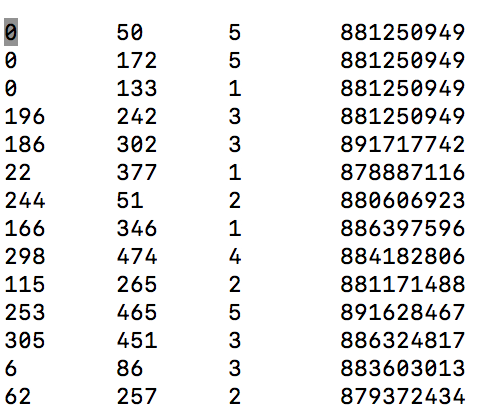

In [4]:
from IPython.display import Image as im
im('data.png')
# column order = User id, movie id, rating, timestamp

In [ ]:
# the codes here are run in hadoop using a virtual machine, not in Jupyter Notebooks


# import the libraries
from mrjob.job import MRJob
from mrjob.step import MRStep

# inherite contens from MRJOB 
class Sum_of_each_Rating(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_ratings,
                   reducer=self.reducer_count_ratings)
        ]
    # load the data, and each rating will be counted as 1
    def mapper_get_ratings(self, _, line):
        (userID, movieID, rating, timestamp) = line.split('\t')
        yield rating, 1
    
    # each key is a rating from 1 to 5, the sum function will add up the number of time each key being rated
    # in SQL, this will be just slelect rating, count(rating) from table group by rating.
    # rating -> key, and 1 -> values from the above function to the below one.
    def reducer_count_ratings(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    Sum_of_each_Rating.run()

# Output results

In [ ]:
# run it locally
python Sum_of_each_Rating.py u.data

# run it with hadoop with the file in the home directory(client node)
python Sum_of_each_Rating.py -r hadoop --hadoop-streaming-jar /usr/hdp/current/hadoop-mapreduce-client/hadoop-streaming.jar u.data

# using the file in HDFS
python Sum_of_each_Rating.py -r hadoop --hadoop-streaming-jar /usr/hdp/current/hadoop-mapreduce-client/hadoop-streaming.jar hdfs:///user/maria_dev/ml-100k/u.data
    

# In this example, I will run the code locally because it is much faster.

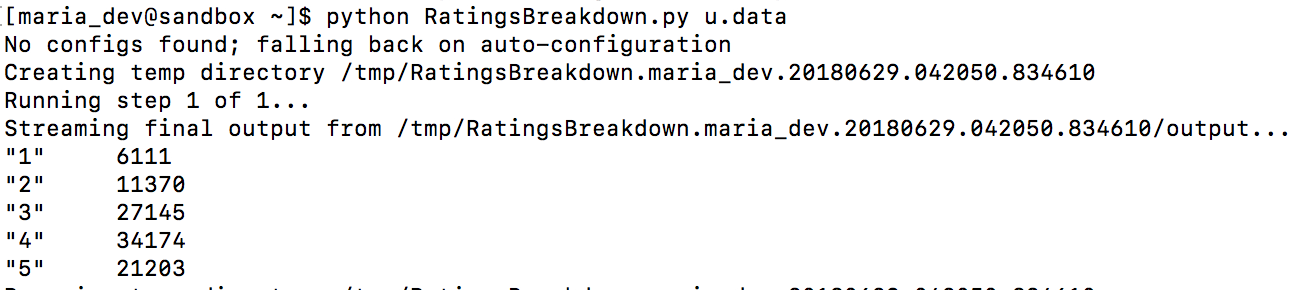

In [5]:
from IPython.display import Image as im
im('sum_of_each_rating.png')

# Challenge: Sort the ratings by their sum from large to small

In [ ]:
# import the libraries
from mrjob.job import MRJob
from mrjob.step import MRStep

# inherite contens from MRJOB 
class RatingsBreakdown(MRJob):
    def steps(self):
        return [
            MRStep(mapper=self.mapper_get_ratings,
                   reducer=self.reducer_count_ratings)
        ]
    # load the data, and each rating will be counted as 1
    def mapper_get_ratings(self, _, line):
        (userID, movieID, rating, timestamp) = line.split('\t')
        yield rating, 1
    
    # each key is a rating from 1 to 5, the sum function will add up the number of time each key being rated
    # in SQL, this will be just slelect rating, count(rating) from table group by rating.
    def reducer_count_ratings(self, key, values):
        yield key, sum(values)

if __name__ == '__main__':
    RatingsBreakdown.run()
